**Source:** https://edition.cnn.com/markets/fear-and-greed?utm_source=hp


The Fear & Greed Index is a way to gauge stock market movements and whether stocks are fairly priced. The theory is based on the logic that excessive fear tends to drive down share prices, and too much greed tends to have the opposite effect.

**How is Fear & Greed Calculated?**

The Fear & Greed Index is a compilation of seven different indicators that measure some aspect of stock market behavior. They are market momentum, stock price strength, stock price breadth, put and call options, junk bond demand, market volatility, and safe haven demand. The index tracks how much these individual indicators deviate from their averages compared to how much they normally diverge. The index gives each indicator equal weighting in calculating a score from 0 to 100, with 100 representing maximum greediness and 0 signaling maximum fear.

**How often is the Fear & Greed Index calculated?**

Every component and the Index are calculated as soon as new data becomes available.

**How to use Fear & Greed Index?**

The Fear & Greed Index is used to gauge the mood of the market. Many investors are emotional and reactionary, and fear and greed sentiment indicators can alert investors to their own emotions and biases that can influence their decisions. When combined with fundamentals and other analytical tools, the Index can be a helpful way to assess market sentiment.

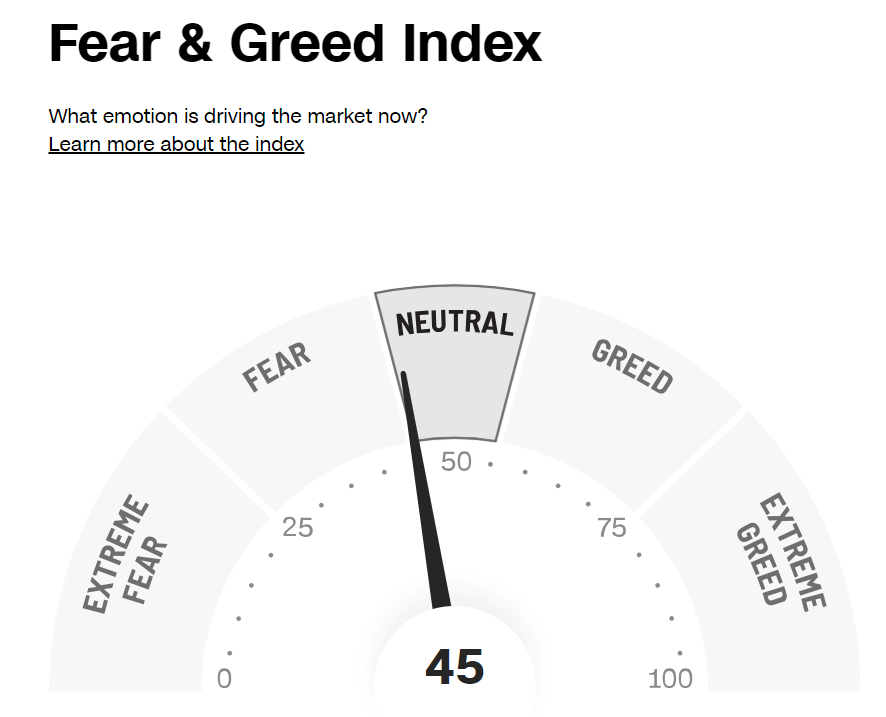

In [75]:
import requests, csv, json, urllib
import pandas as pd
import time
from fake_useragent import UserAgent
from datetime import datetime

BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata/"
ua = UserAgent()

# (YYY-MM-DD)
START_DATE = '2021-01-01'

headers = {
   'User-Agent': ua.random,
   }

r = requests.get(BASE_URL + START_DATE, headers = headers)
data = r.json()

data = data['fear_and_greed_historical']

data_cleaned = [
    {'Date': datetime.utcfromtimestamp(item['x'] / 1000), 'Rating': item['y'], 'Sentiment': item['rating']}
    for item in data['data']
]

df = pd.DataFrame(data_cleaned)

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

df

,Date,Rating,Sentiment
0,2021-01-04,50.000000,neutral
1,2021-01-05,50.000000,neutral
2,2021-01-06,50.000000,neutral
3,2021-01-07,50.000000,neutral
4,2021-01-08,50.000000,neutral
...,...,...,...
962,2024-10-30,54.000000,neutral
963,2024-10-31,46.527473,neutral
964,2024-11-01,44.490110,fear
965,2024-11-04,44.989011,fear


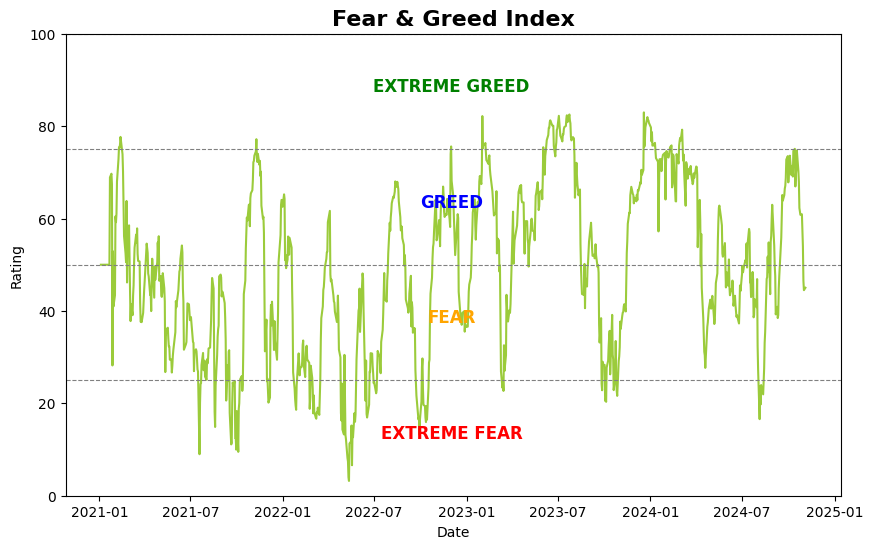

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,6))

plt.plot(df['Date'], df['Rating'], color='#9BCB3B')

for y_value in [25, 50, 75, 100]:
    plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.8)

plt.text(df['Date'].median(), 12.5, 'EXTREME FEAR', fontsize=12, color='red', fontweight='bold', ha='center')
plt.text(df['Date'].median(), 37.5, 'FEAR', fontsize=12, color='orange',fontweight='bold', ha='center')
plt.text(df['Date'].median(), 62.5, 'GREED', fontsize=12, color='blue',fontweight='bold', ha='center')
plt.text(df['Date'].median(), 87.5, 'EXTREME GREED', fontsize=12, color='green', fontweight='bold', ha='center')

plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Fear & Greed Index', fontsize=16, fontweight='bold')

plt.ylim(0, 100)
plt.show()

In [106]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = df['Rating'].iloc[-1],  # Valor atual do Fear & Greed Index
    title = {'text': "Fear & Greed Index"},
    gauge = {
        'axis': {'range': [0, 100]},  # Faixa total de 0 a 100
        'bar': {'color': "black"},    # Cor do ponteiro
        'steps': [
            {'range': [0, 25], 'color': 'red'},        # Extreme Fear
            {'range': [25, 50], 'color': 'orange'},    # Fear
            {'range': [50, 75], 'color': 'lightgreen'},# Greed
            {'range': [75, 100], 'color': 'green'}     # Extreme Greed
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},  # Linha do indicador
            'thickness': 0.75,
            'value': df['Rating'].iloc[-1]           # Posiciona o ponteiro
        }
    }
))

fig.show()



In [144]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=df['Rating'].iloc[-1],
    title={'text': "Fear & Greed Index", 'font': {'size': 30, 'color': 'black', 'family': 'Arial Black'}},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "black"},
        'steps': [
            {'range': [0, 25], 'color': 'red'},
            {'range': [25, 50], 'color': 'orange'},
            {'range': [50, 75], 'color': 'lightgreen'},
            {'range': [75, 100], 'color': 'green'}
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': df['Rating'].iloc[-1]
        }
    }
))

fig.add_annotation(text="EXTREME", x=0.36, y=0.25, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="FEAR", x=0.36, y=0.205, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="FEAR", x=0.45, y=0.55, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="GREED", x=0.55, y=0.555, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="EXTREME", x=0.64, y=0.25, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="GREED", x=0.64, y=0.205, showarrow=False, font=dict(size=15, color='black', weight='bold'))

fig.show()


In [147]:
import plotly.graph_objects as go

rating_value = df['Rating'].iloc[-1]
if rating_value <= 25:
    text_color = 'red'  # Extreme Fear
elif rating_value <= 50:
    text_color = 'orange'  # Fear
elif rating_value <= 75:
    text_color = 'lightgreen'  # Greed
else:
    text_color = 'green'  # Extreme Greed

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=rating_value,
    title={'text': "Fear & Greed Index", 'font': {'size': 30, 'color': 'black', 'family': 'Arial Black'}},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "black"},
        'steps': [
            {'range': [0, 25], 'color': 'red'},
            {'range': [25, 50], 'color': 'orange'},
            {'range': [50, 75], 'color': 'lightgreen'},
            {'range': [75, 100], 'color': 'green'}
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': rating_value
        }
    },
    number={'font': {'color': text_color, 'size': 90}}
))

fig.add_annotation(text="EXTREME", x=0.36, y=0.25, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="FEAR", x=0.36, y=0.205, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="FEAR", x=0.45, y=0.55, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="GREED", x=0.55, y=0.555, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="EXTREME", x=0.64, y=0.25, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="GREED", x=0.64, y=0.205, showarrow=False, font=dict(size=15, color='black', weight='bold'))

fig.show()


In [174]:
import plotly.graph_objects as go

rating_value = df['Rating'].iloc[-1]
if rating_value <= 25:
    text_color = 'red'  # Extreme Fear
elif rating_value <= 50:
    text_color = 'orange'  # Fear
elif rating_value <= 75:
    text_color = 'lightgreen'  # Greed
else:
    text_color = 'green'  # Extreme Greed

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=rating_value,
    title={'text': "Fear & Greed Index", 'font': {'size': 30, 'color': 'black', 'family': 'Arial Black'}},
    gauge={
        'axis': {
            'range': [0, 100],
            'tickmode': 'array',
            'tickvals': [0, 25, 50, 75, 100],
            'ticktext': ['0', '25', '50', '75', '100']
        },
        'bar': {'color': "black"},
        'steps': [
            {'range': [0, 25], 'color': 'red'},
            {'range': [25, 45], 'color': 'orange'},
            {'range': [45, 55], 'color': 'white'},
            {'range': [55, 75], 'color': 'lightgreen'},
            {'range': [75, 100], 'color': 'green'}
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': rating_value
        }
    },
    number={'font': {'color': text_color, 'size': 90}}
))

fig.add_annotation(text="EXTREME", x=0.36, y=0.25, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="FEAR", x=0.36, y=0.205, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="FEAR", x=0.41, y=0.55, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="GREED", x=0.59, y=0.55, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="EXTREME", x=0.64, y=0.25, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="GREED", x=0.64, y=0.205, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="NEUTRAL", x=0.50, y=0.67, showarrow=False, font=dict(size=15, color='black', weight='bold'))
fig.add_annotation(text="Source: CNN", x=0.225, y=-0.07, showarrow=False, font=dict(size=9, color='black', weight='bold'))

fig.show()